In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os
import keras
import shutil
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator #Figure out all details
train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2
)
val_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2
)

In [ ]:
training_set = train_datagen.flow_from_directory( #Flow from directory
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/train",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical"
)
test_set = test_datagen.flow_from_directory(
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/test",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical"
)
val_set = val_datagen.flow_from_directory(
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/val",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical"
)

Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


# VGG modified

In [ ]:
#VGG-16 modified to 13 layers
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='VALID', input_shape=training_set.image_shape), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),#know conv2d and MaxPooling2D, using 0 padding, and stride is how you move across
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),#Dimensionality reduction

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 128)       

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')]) 

In [ ]:
training_set.image_shape

(64, 64, 3)

In [ ]:
m1= model.fit(training_set, validation_data=val_set,batch_size=150,epochs=3)

Epoch 1/3
312/312 [==============================] - 138s 439ms/step - loss: 0.9494 - accuracy: 0.6240 - precision: 0.7183 - recall: 0.4912 - val_loss: 0.5801 - val_accuracy: 0.7681 - val_precision: 0.8154 - val_recall: 0.7254
Epoch 2/3
312/312 [==============================] - 135s 434ms/step - loss: 0.4153 - accuracy: 0.8422 - precision: 0.8651 - recall: 0.8172 - val_loss: 0.1668 - val_accuracy: 0.9404 - val_precision: 0.9448 - val_recall: 0.9380
Epoch 3/3
312/312 [==============================] - 142s 454ms/step - loss: 0.1759 - accuracy: 0.9372 - precision: 0.9416 - recall: 0.9337 - val_loss: 0.0429 - val_accuracy: 0.9879 - val_precision: 0.9887 - val_recall: 0.9863


In [ ]:
model.evaluate(test_set)

40/40 [==============================] - 21s 535ms/step - loss: 0.0406 - accuracy: 0.9848 - precision: 0.9856 - recall: 0.9848


[0.04063433036208153,
 0.9847878217697144,
 0.9855769276618958,
 0.9847878217697144]

In [ ]:
test_labels = test_set.classes
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)

40/40 [==============================] - 13s 334ms/step


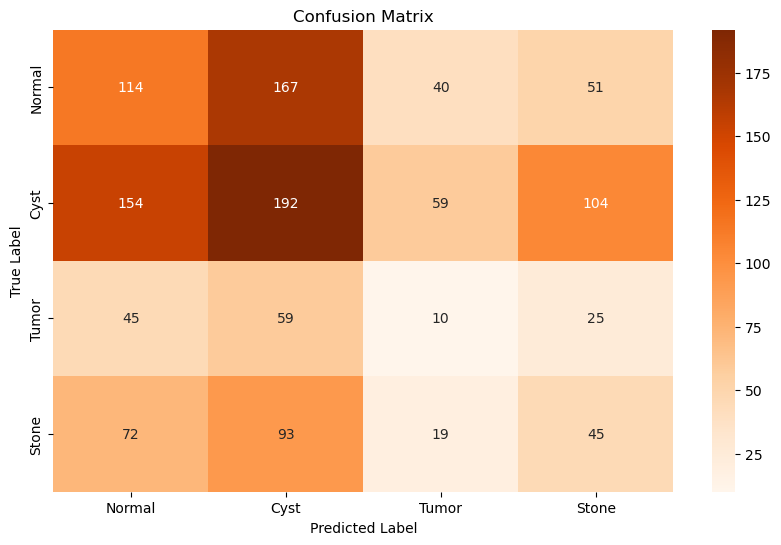

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set.classes, y_pred_classes)
class_labels = ['Normal', 'Cyst', 'Tumor', 'Stone']

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels, ax=ax, fmt='g')
# Set the plot title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
# Show the plot
plt.show()

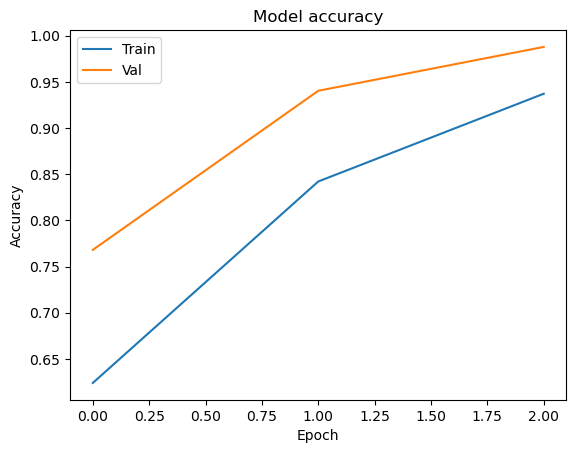

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


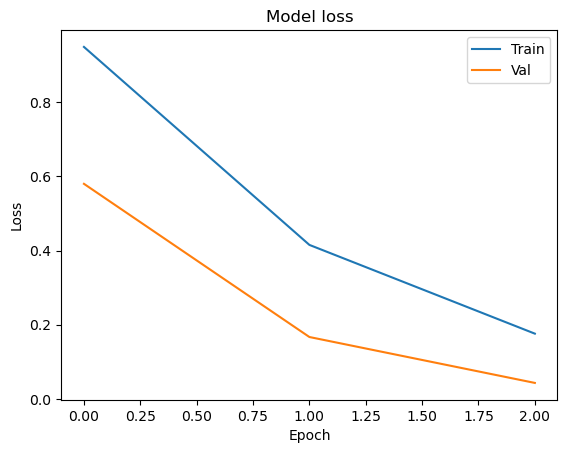

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m1.history['loss'])
plt.plot(m1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


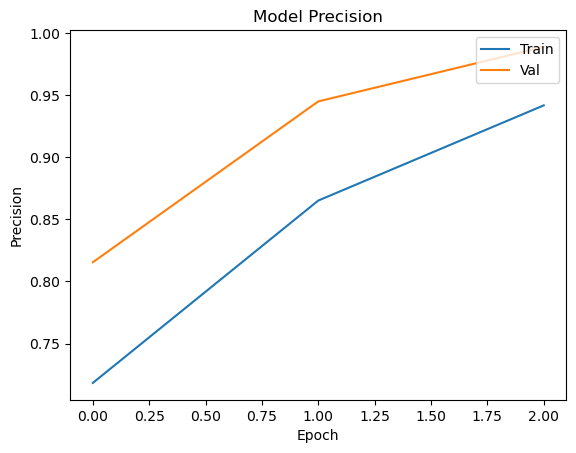

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m1.history['precision'])
plt.plot(m1.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


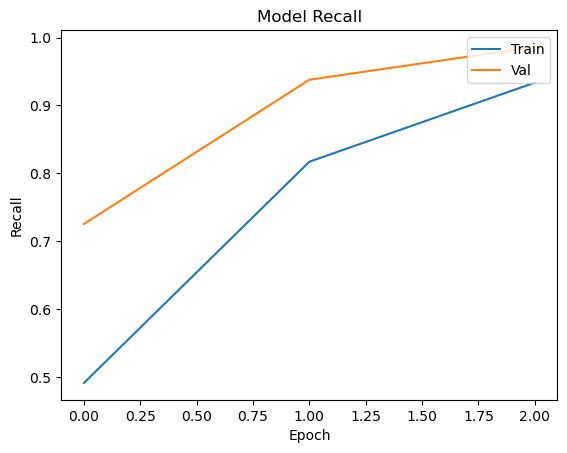

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m1.history['recall'])
plt.plot(m1.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


# AlexNet

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers import concatenate

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential()

# Layer 1
model2.add(Conv2D(32,(3,3), strides=(4,4), activation='relu', input_shape=(64,64,3)))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Layer 2
model2.add(Conv2D(64,(3,3), strides=(1,1), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Layer 3
model2.add(Conv2D(128,(3,3), strides=(1,1), activation='relu', padding="same"))

# Layer 4
model2.add(Conv2D(256,(3,3), strides=(1,1), activation='relu', padding="same"))

# Layer 5
model2.add(Conv2D(512,(3,3), strides=(1,1), activation='relu', padding="same"))


# Layer 6
model2.add(Flatten())
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.5))

# Layer 7
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(0.5))

# Layer 8
model2.add(Dense(units=4, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')])


In [ ]:
m2=model2.fit(training_set, validation_data=val_set,batch_size=150,epochs=3)

Epoch 1/3
312/312 [==============================] - 132s 418ms/step - loss: 1.1346 - accuracy: 0.5570 - precision: 0.6964 - recall: 0.3051 - val_loss: 0.9155 - val_accuracy: 0.6562 - val_precision: 0.7287 - val_recall: 0.5233
Epoch 2/3
312/312 [==============================] - 129s 412ms/step - loss: 0.8674 - accuracy: 0.6739 - precision: 0.7692 - recall: 0.5650 - val_loss: 0.6943 - val_accuracy: 0.7150 - val_precision: 0.8311 - val_recall: 0.6063
Epoch 3/3
312/312 [==============================] - 135s 432ms/step - loss: 0.7024 - accuracy: 0.7377 - precision: 0.8292 - recall: 0.6258 - val_loss: 0.4785 - val_accuracy: 0.8261 - val_precision: 0.8848 - val_recall: 0.7424


In [ ]:
model2.evaluate(test_set)

40/40 [==============================] - 13s 315ms/step - loss: 0.4794 - accuracy: 0.8223 - precision: 0.8860 - recall: 0.7406


[0.47935160994529724,
 0.8222578167915344,
 0.8860152959823608,
 0.7405924797058105]

In [ ]:
test_labels = test_set.classes
y_pred1 = model2.predict(test_set)
y_pred_classes1 = np.argmax(y_pred1, axis=1)

40/40 [==============================] - 13s 320ms/step


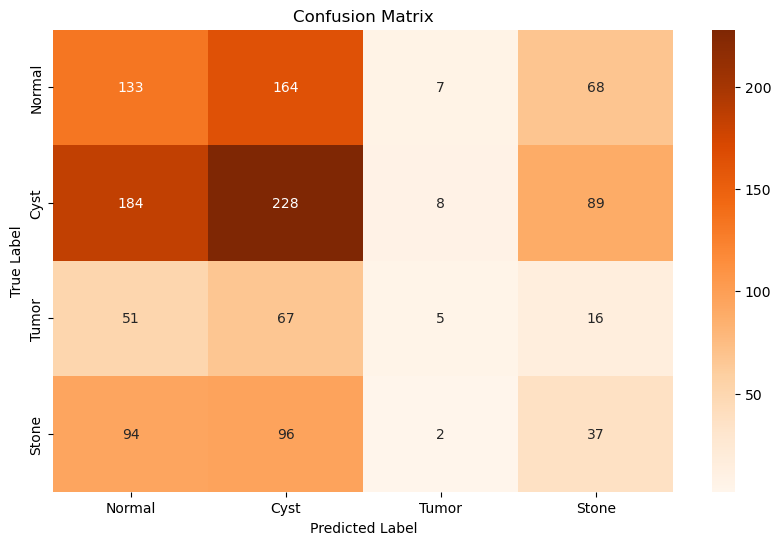

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set.classes, y_pred_classes1)
class_labels = ['Normal', 'Cyst', 'Tumor', 'Stone']

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels, ax=ax, fmt='g')
# Set the plot title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
# Show the plot
plt.show()

In [ ]:
model2.summary()

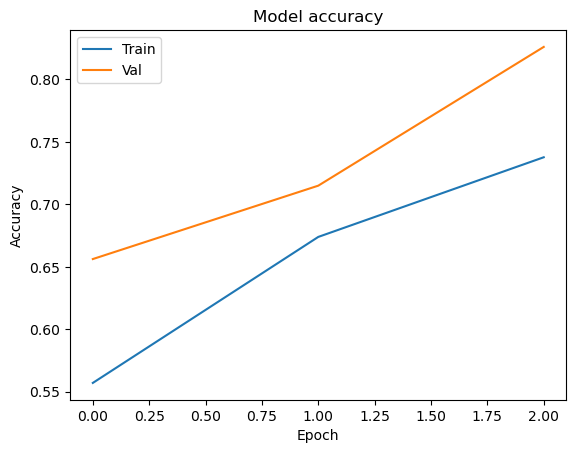

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


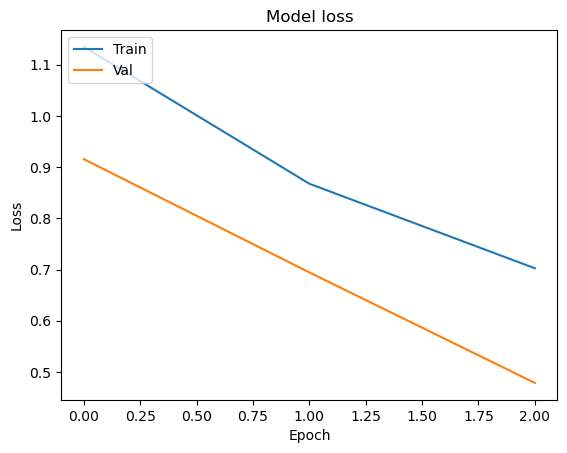

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


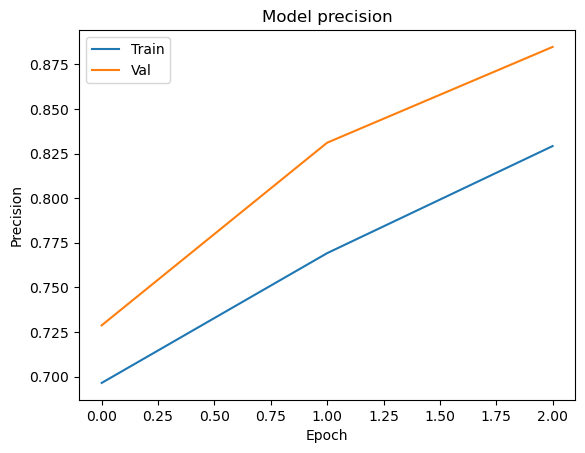

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m2.history['precision'])
plt.plot(m2.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


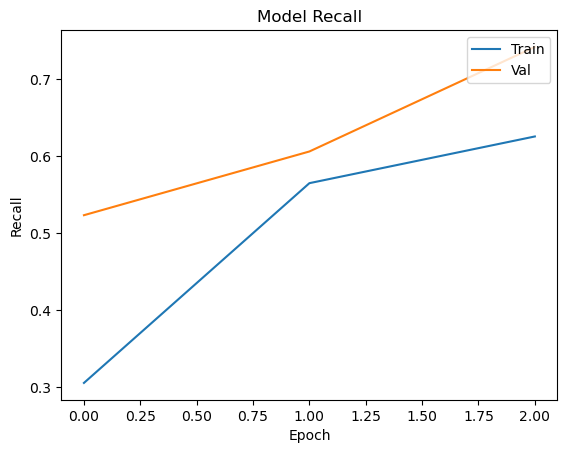

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m2.history['recall'])
plt.plot(m2.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


# Original VGG-16 Structure

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model3 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
training_set1 = train_datagen.flow_from_directory( #Flow from directory
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/train",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)
test_set1 = test_datagen.flow_from_directory(
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/test",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)
val_set1 = val_datagen.flow_from_directory(
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/val",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

In [ ]:
m3=model3.fit(training_set1, validation_data=val_set1,batch_size=150,epochs=3)

In [ ]:
model3.evaluate(test_set)

In [ ]:
model3.summary()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m3.history['accuracy'])
plt.plot(m3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(m3.history['loss'])
plt.plot(m3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(m3.history['precision'])
plt.plot(m3.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(m3.history['recall'])
plt.plot(m3.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


# MobileNet

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# define input shape
input_shape = (64, 64, 3)

# define number of classes
num_classes = 4

base_model = MobileNet(weights='/kaggle/input/mobilenet-1-0-224/mobilenet_1_0_224_tf_no_top.h5',input_shape=input_shape, include_top=False, pooling='avg')

model4 = Sequential()
model4.add(base_model)
model4.add(Dense(256, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')])

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_64 (Function  (None, 1024)             3228864   
 al)                                                             
                                                                 
 dense_14 (Dense)            (None, 256)               262400    
                                                                 
 dense_15 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 3,492,292
Trainable params: 3,470,404
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
m4=model4.fit(training_set, validation_data=val_set,batch_size=150,epochs=3)

Epoch 1/3
312/312 [==============================] - 209s 642ms/step - loss: 0.4582 - accuracy: 0.8417 - precision: 0.8634 - recall: 0.8211 - val_loss: 0.9587 - val_accuracy: 0.7415 - val_precision: 0.7554 - val_recall: 0.7262
Epoch 2/3
312/312 [==============================] - 188s 600ms/step - loss: 0.1849 - accuracy: 0.9404 - precision: 0.9443 - recall: 0.9352 - val_loss: 0.1977 - val_accuracy: 0.9275 - val_precision: 0.9303 - val_recall: 0.9243
Epoch 3/3
312/312 [==============================] - 191s 612ms/step - loss: 0.1466 - accuracy: 0.9528 - precision: 0.9567 - recall: 0.9481 - val_loss: 0.2130 - val_accuracy: 0.9251 - val_precision: 0.9295 - val_recall: 0.9122


In [ ]:
model4.evaluate(test_set)

40/40 [==============================] - 17s 423ms/step - loss: 0.1793 - accuracy: 0.9335 - precision: 0.9451 - recall: 0.9239


[0.1793108880519867,
 0.9335468411445618,
 0.9451269507408142,
 0.9239391684532166]

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_64 (Function  (None, 1024)             3228864   
 al)                                                             
                                                                 
 dense_14 (Dense)            (None, 256)               262400    
                                                                 
 dense_15 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 3,492,292
Trainable params: 3,470,404
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
test_labels = test_set.classes
y_pred2 = model4.predict(test_set)
y_pred_classes2 = np.argmax(y_pred2, axis=1)

40/40 [==============================] - 14s 337ms/step


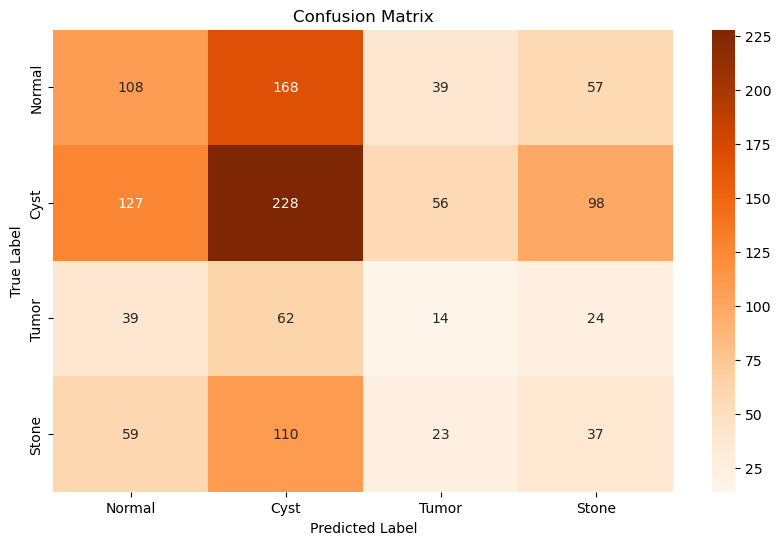

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set.classes, y_pred_classes2)
class_labels = ['Normal', 'Cyst', 'Tumor', 'Stone']

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels, ax=ax, fmt='g')
# Set the plot title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
# Show the plot
plt.show()

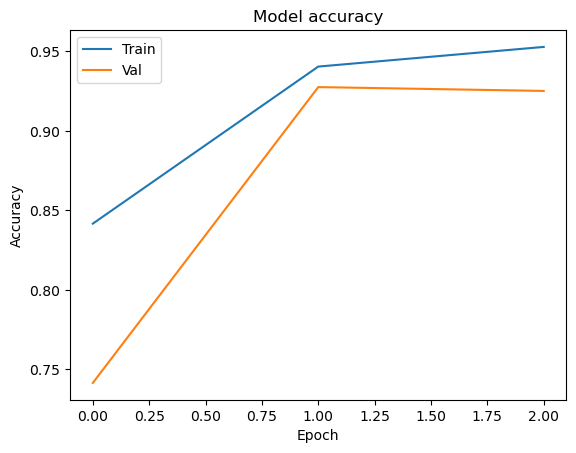

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m4.history['accuracy'])
plt.plot(m4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

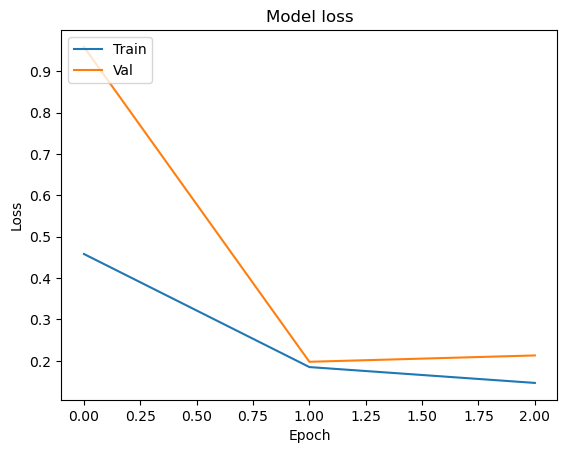

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m4.history['loss'])
plt.plot(m4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


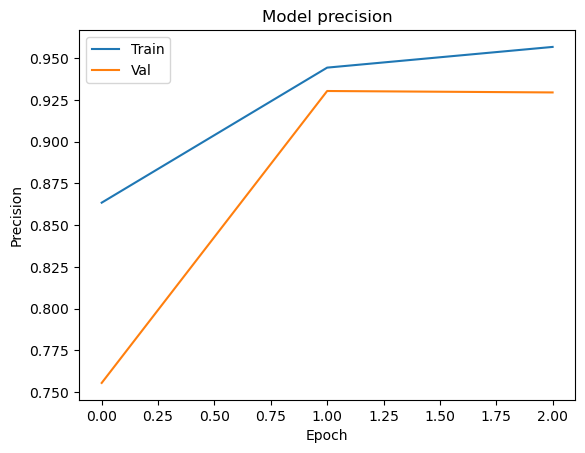

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m4.history['precision'])
plt.plot(m4.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

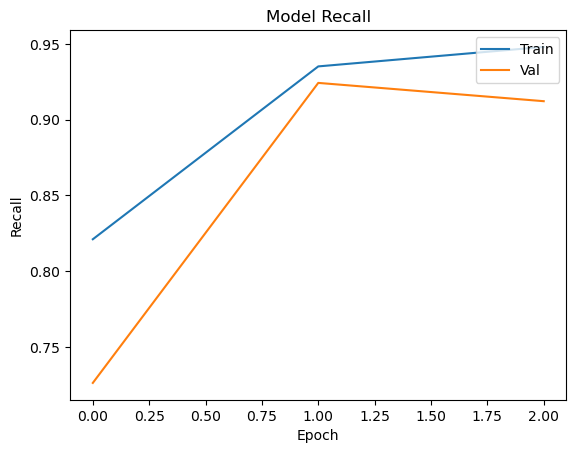

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m4.history['recall'])
plt.plot(m4.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


# MobileNet V2

In [ ]:
import tensorflow as tf

# Define input shape
input_shape = (64, 64, 3)

# Define number of classes
num_classes = 4

# Define MobileNetV2 model
modell = tf.keras.applications.MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='/kaggle/input/mobilenet-v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
)

# Add custom output layer
x = modell.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Define new model with custom output layer
model5 = tf.keras.models.Model(inputs=modell.input, outputs=x)

# Freeze MobileNetV2 layers
for layer in model5.layers[:-2]:
    layer.trainable = False



# Print model summary
model5.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 32, 32, 32)   864         ['input_6[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 32, 32, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 32, 32, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

In [ ]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')])


In [ ]:
m5=model5.fit(training_set, validation_data=val_set,batch_size=150,epochs=3)

Epoch 1/3
312/312 [==============================] - 133s 414ms/step - loss: 0.7675 - accuracy: 0.7066 - precision: 0.7723 - recall: 0.6141 - val_loss: 0.7113 - val_accuracy: 0.7472 - val_precision: 0.7776 - val_recall: 0.6924
Epoch 2/3
312/312 [==============================] - 120s 384ms/step - loss: 0.5405 - accuracy: 0.7944 - precision: 0.8363 - recall: 0.7475 - val_loss: 0.5399 - val_accuracy: 0.7939 - val_precision: 0.8341 - val_recall: 0.7568
Epoch 3/3
312/312 [==============================] - 128s 409ms/step - loss: 0.4495 - accuracy: 0.8299 - precision: 0.8589 - recall: 0.7945 - val_loss: 0.4495 - val_accuracy: 0.8293 - val_precision: 0.8608 - val_recall: 0.7915


In [ ]:
model5.evaluate(test_set)

40/40 [==============================] - 13s 329ms/step - loss: 0.3905 - accuracy: 0.8575 - precision: 0.8968 - recall: 0.8207


[0.3904988765716553,
 0.8574860095977783,
 0.8967629075050354,
 0.8206565380096436]

In [ ]:
test_labels = test_set.classes
y_pred3 = model5.predict(test_set)
y_pred_classes3 = np.argmax(y_pred3, axis=1)

40/40 [==============================] - 14s 330ms/step


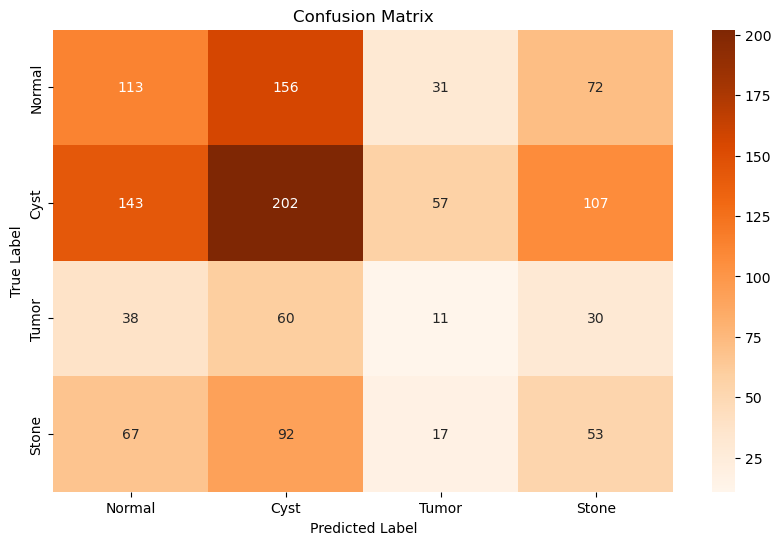

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set.classes, y_pred_classes3)
class_labels = ['Normal', 'Cyst', 'Tumor', 'Stone']

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels, ax=ax, fmt='g')
# Set the plot title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
# Show the plot
plt.show()

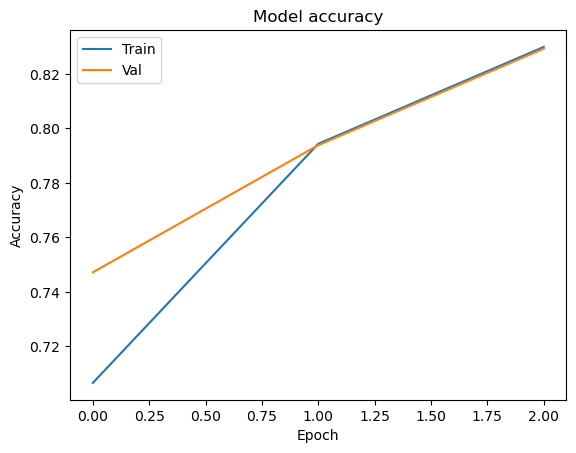

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m5.history['accuracy'])
plt.plot(m5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

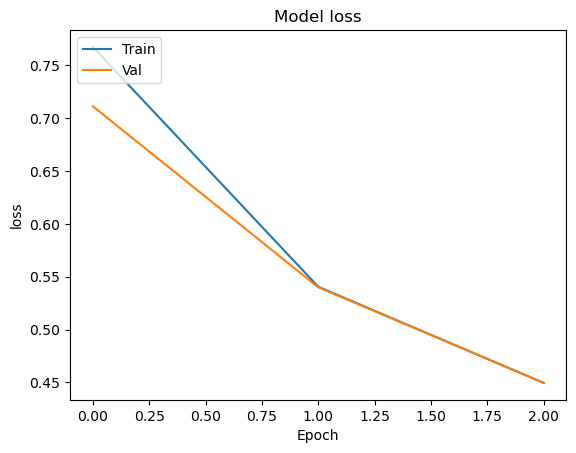

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m5.history['loss'])
plt.plot(m5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

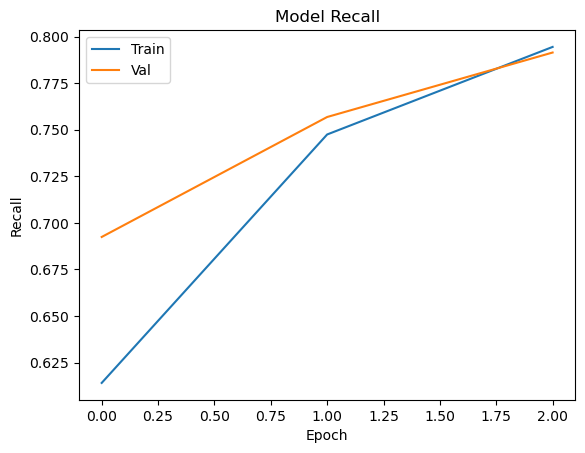

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m5.history['recall'])
plt.plot(m5.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

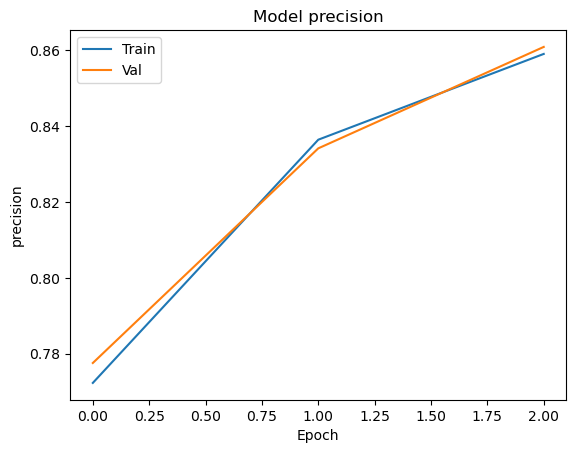

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m5.history['precision'])
plt.plot(m5.history['val_precision'])
plt.title('Model precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Efficient Net

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

# Create EfficientNetB0 model
model = EfficientNetB0(input_shape=(64, 64, 3), include_top=False, weights=None)

# Add custom output layers
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)

# Create final model
model6 = tf.keras.models.Model(model.input, x)

# Compile model with desired loss and metrics
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')])


In [ ]:
m6=model6.fit(training_set, validation_data=val_set,batch_size=150,epochs=3)

Epoch 1/3
312/312 [==============================] - 237s 672ms/step - loss: 0.9648 - accuracy: 0.6357 - precision: 0.7243 - recall: 0.5179 - val_loss: 5.4491 - val_accuracy: 0.2979 - val_precision: 0.2979 - val_recall: 0.2979
Epoch 2/3
312/312 [==============================] - 203s 649ms/step - loss: 0.5256 - accuracy: 0.8098 - precision: 0.8473 - recall: 0.7614 - val_loss: 5.9865 - val_accuracy: 0.2995 - val_precision: 0.2995 - val_recall: 0.2995
Epoch 3/3
312/312 [==============================] - 202s 645ms/step - loss: 0.3127 - accuracy: 0.8922 - precision: 0.9060 - recall: 0.8789 - val_loss: 0.4917 - val_accuracy: 0.8293 - val_precision: 0.8382 - val_recall: 0.8172


In [ ]:
model6.evaluate(test_set)

40/40 [==============================] - 14s 347ms/step - loss: 0.4351 - accuracy: 0.8471 - precision: 0.8550 - recall: 0.8359


[0.43513908982276917,
 0.8470776677131653,
 0.8550368547439575,
 0.8358687162399292]

In [ ]:
test_labels = test_set.classes
y_pred4 = model6.predict(test_set)
y_pred_classes4 = np.argmax(y_pred4, axis=1)

40/40 [==============================] - 16s 351ms/step


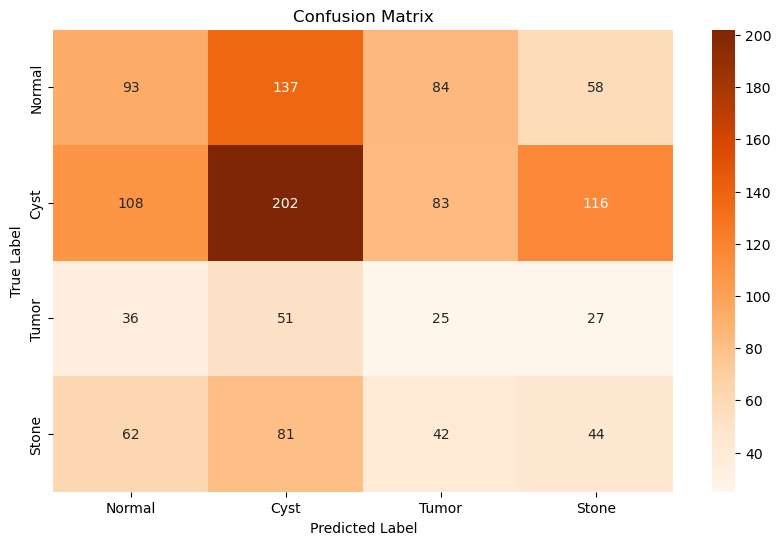

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set.classes, y_pred_classes4)
class_labels = ['Normal', 'Cyst', 'Tumor', 'Stone']

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels, ax=ax, fmt='g')
# Set the plot title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
# Show the plot
plt.show()

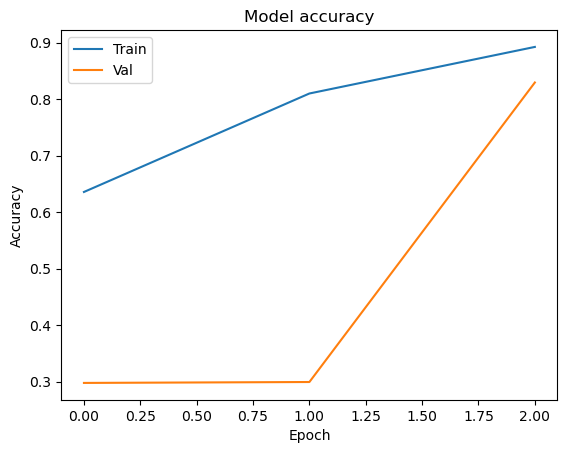

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m6.history['accuracy'])
plt.plot(m6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

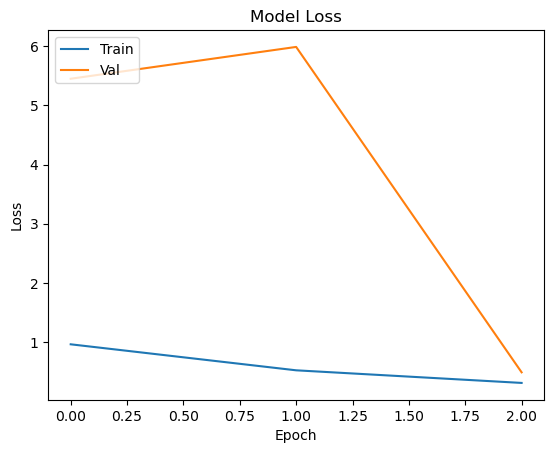

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m6.history['loss'])
plt.plot(m6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

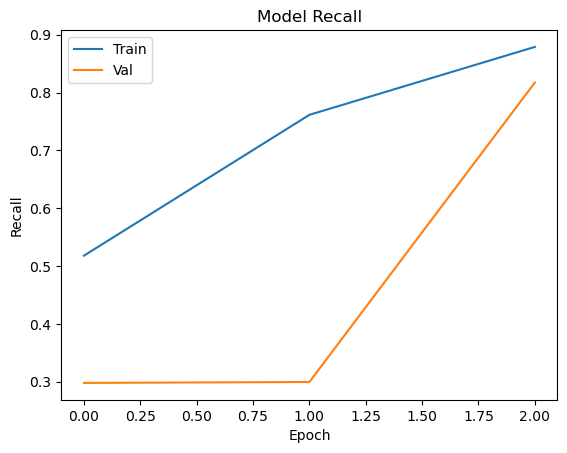

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m6.history['recall'])
plt.plot(m6.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

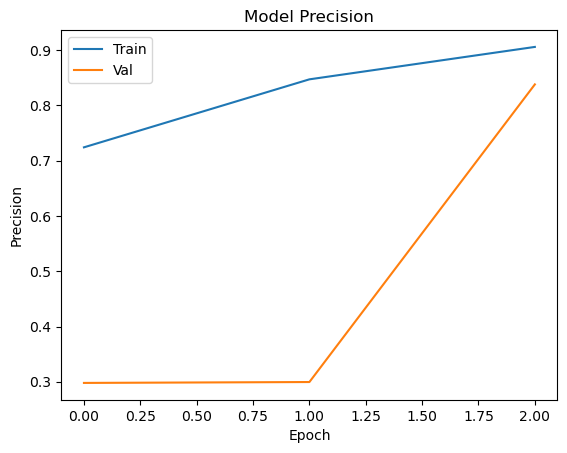

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m6.history['precision'])
plt.plot(m6.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Mass Work

In [ ]:
model.predict()